<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Neural_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gas_turbines=pd.read_csv('/content/gas_turbines.csv')
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas_turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
gas_turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

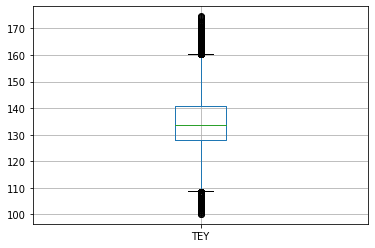

In [6]:
#Box plot
gas_turbines.boxplot(column=['TEY'])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(gas_turbines.iloc[:,0:11])
scaler.transform(gas_turbines.iloc[:,0:11])

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [8]:
gas_turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX']
gas_turbine=gas_turbines[columns]

In [10]:
input=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
output=['TEY']

X=gas_turbine[input]
y=gas_turbine[output]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3)

In [12]:
#Using KERAS model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [13]:
#create model
model = Sequential()
model.add(Dense(14, input_dim=10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Compile model
Model=model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# fit the keras model on the dataset
Model=model.fit(X_train, y_train,validation_split=0.33,epochs=100,batch_size=11)

Epoch 1/100
642/642 [==============================] - 14s 2ms/step - loss: -372.4342 - accuracy: 0.0000e+00 - val_loss: -1278.7368 - val_accuracy: 0.0000e+00
Epoch 2/100
642/642 [==============================] - 1s 1ms/step - loss: -1527.6008 - accuracy: 0.0000e+00 - val_loss: -2256.6509 - val_accuracy: 0.0000e+00
Epoch 3/100
642/642 [==============================] - 1s 2ms/step - loss: -2492.4161 - accuracy: 0.0000e+00 - val_loss: -3211.5801 - val_accuracy: 0.0000e+00
Epoch 4/100
642/642 [==============================] - 1s 1ms/step - loss: -3443.8938 - accuracy: 0.0000e+00 - val_loss: -4159.0474 - val_accuracy: 0.0000e+00
Epoch 5/100
642/642 [==============================] - 1s 1ms/step - loss: -4398.7887 - accuracy: 0.0000e+00 - val_loss: -5102.5742 - val_accuracy: 0.0000e+00
Epoch 6/100
642/642 [==============================] - 1s 1ms/step - loss: -5337.2654 - accuracy: 0.0000e+00 - val_loss: -6044.7856 - val_accuracy: 0.0000e+00
Epoch 7/100
642/642 [=========================

In [16]:
y_pred=model.predict(X_test)

In [17]:
accuracy = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1]*100))

141/141 [==============================] - 0s 1ms/step - loss: -94239.3438 - accuracy: 0.0000e+00
accuracy: 0.00%


In [18]:
#Getting accuracy 0% for backpropagation method, therefore applying hyperparameter method

#building the new model
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="linear"))
    model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])
    return model  

In [19]:
new_model = prep_model([1])
History=new_model.fit(X_train,y_train,epochs=150)
pred_train = new_model.predict(X_train)

Epoch 1/150
329/329 [==============================] - 8s 719us/step - loss: 6267.9715 - mse: 6267.9715
Epoch 2/150
329/329 [==============================] - 0s 746us/step - loss: 203.2725 - mse: 203.2725
Epoch 3/150
329/329 [==============================] - 0s 818us/step - loss: 195.8946 - mse: 195.8946
Epoch 4/150
329/329 [==============================] - 0s 813us/step - loss: 184.5236 - mse: 184.5236
Epoch 5/150
329/329 [==============================] - 0s 803us/step - loss: 169.2698 - mse: 169.2698
Epoch 6/150
329/329 [==============================] - 0s 748us/step - loss: 153.8520 - mse: 153.8520
Epoch 7/150
329/329 [==============================] - 0s 801us/step - loss: 141.9597 - mse: 141.9597
Epoch 8/150
329/329 [==============================] - 0s 762us/step - loss: 127.5830 - mse: 127.5830
Epoch 9/150
329/329 [==============================] - 0s 801us/step - loss: 113.0919 - mse: 113.0919
Epoch 10/150
329/329 [==============================] - 0s 812us/step - loss: 96

In [20]:
# Predicting the Test set results
y_pred = new_model.predict(X_test)
y_pred

array([[131.38275],
       [160.63376],
       [132.83496],
       ...,
       [133.44194],
       [133.25601],
       [133.97346]], dtype=float32)

In [21]:
from sklearn.metrics import r2_score
result = r2_score(y_test, y_pred)
print(result)

0.9951078834139945


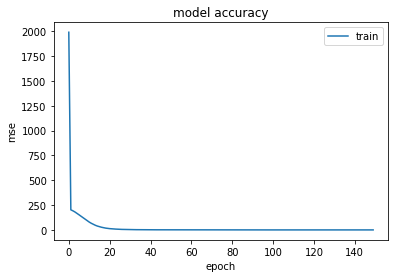

In [22]:
#from hyperparameter method got accuracy 99%

#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

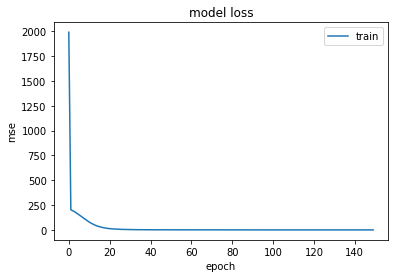

In [23]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()